In [4]:
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import numpy as np
# Import necessary libraries
import math
# Import necessary libraries
import ast


In [5]:
!pip install kaggle

In [6]:
# Import necessary libraries
import zipfile

In [7]:
# Extract data from zip file
with zipfile.ZipFile("C:/Users/rajga/Desktop/python/VSCODE/USaccidentEDA/usaccidents.zip") as zef:
    zef.extractall()

In [8]:
# Load the dataset into a DataFrame
df = pd.read_csv("C:/Users/rajga/US_Accidents_March23.csv")

In [9]:
# Preview the first few rows of the dataset
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
# Get summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

**Finding Nulls

In [12]:
# Count missing values per column
df.isnull().sum()   #to check nulls

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [13]:
# Summary statistics of numeric columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [14]:
# Count missing values per column
missing_data_percent = df.isnull().sum().sort_values(ascending=False)*100/len(df)


In [15]:
# Calculate percentage of missing data
missing_data_percent=missing_data_percent[missing_data_percent.values >0]


In [16]:
# Calculate percentage of missing data
missing_data_percent

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

<Axes: >

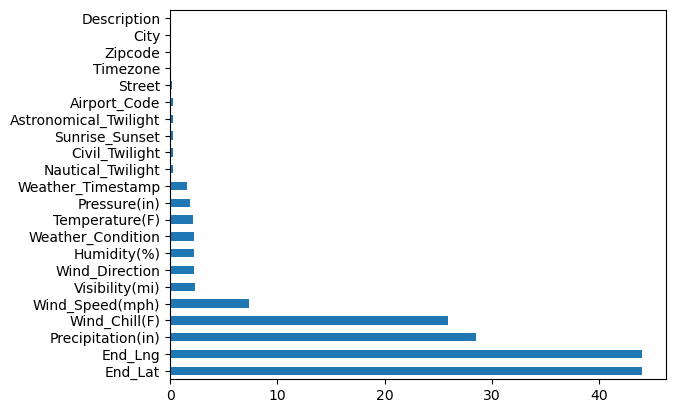

In [17]:
# Calculate percentage of missing data
missing_data_percent.plot(kind='barh')

* above we can see the nulls/na data present, we can see Wind_chill, Precipitation, End_lag, End_Lat have more than half of missing data. We can choose if we cant to remove the columns or just ignore it and never use it.

In [19]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
unq_city=df['City'].unique()


In [21]:
# Preview the first few rows of the dataset
cities_by_accident = df['City'].value_counts().head(20)
cities_by_accident

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

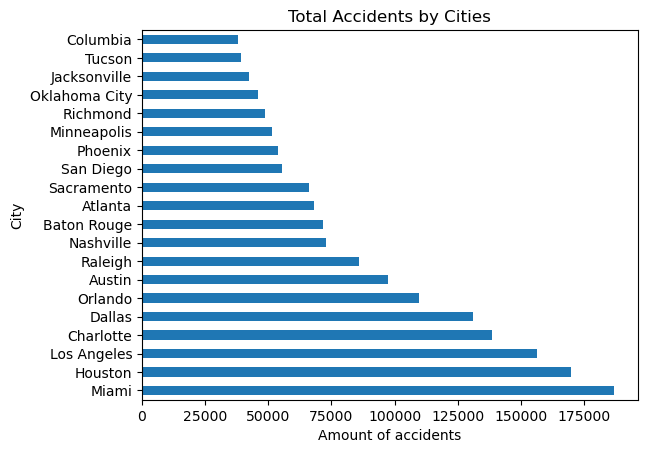

In [22]:
cities_by_accident.plot(kind='barh')
# Visualization
plt.title("Total Accidents by Cities")
# Visualization
plt.xlabel("Amount of accidents")
# Visualization
plt.show()

In [23]:
# Group data by City and State to count accidents
City_state_by_accidents=df.groupby(by=["City","State"]).agg("size").sort_values(ascending=False)

In [24]:
# Preview the first few rows of the dataset
City_state_by_accidents.head(100)

City         State
Miami        FL       186768
Houston      TX       169428
Los Angeles  CA       156491
Charlotte    NC       138345
Dallas       TX       130303
                       ...  
Fremont      CA         9664
Buffalo      NY         9574
Tempe        AZ         9531
Gardena      CA         9479
Ocala        FL         9456
Length: 100, dtype: int64

In [25]:
State_acc=City_state_by_accidents

In [26]:
# Reset index to flatten the DataFrame
State_acc=State_acc.reset_index(name="Count")

In [27]:
State_acc=State_acc.drop(columns="City")

In [28]:
# Preview the first few rows of the dataset
State_acc=State_acc.head(5)

Text(0, 0.5, 'Count of accidents')

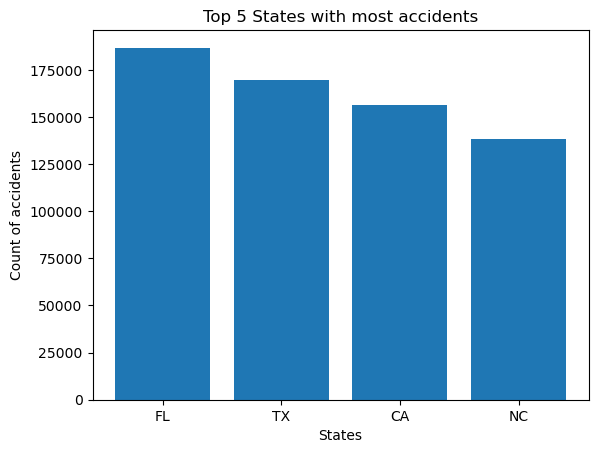

In [29]:
# Visualization
plt.bar(State_acc.State, State_acc.Count)
# Visualization
plt.title("Top 5 States with most accidents")
# Visualization
plt.xlabel("States")
# Visualization
plt.ylabel("Count of accidents")

In [30]:
# Import necessary libraries
import seaborn as sns

C:\Users\rajga\AppData\Local\Temp\ipykernel_18924\1819661599.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city_acc)


<Axes: xlabel='count', ylabel='Density'>

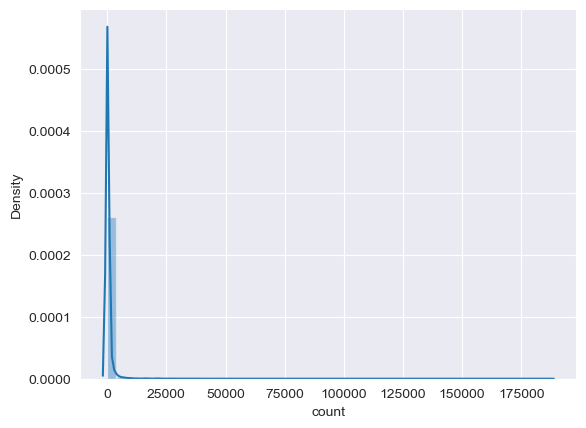

In [31]:
# Visualization
sns.set_style("darkgrid")
# Count accidents per city
city_acc= df['City'].value_counts()
# Visualization
sns.distplot(city_acc)

In [32]:
high_accident_city = city_acc[city_acc>=1000] 
low_accident_city = city_acc[city_acc<1000] 

* differentiating low accident cities and high accidents cities with threshold of 1000

In [34]:
# Reset index to flatten the DataFrame
low_acc= low_accident_city.reset_index(name="Acc")
low_acc.sort_values(by="Acc")

,City,Acc
12459,American Fork-Pleasant Grove,1
11784,Fluker,1
11783,Sidney Center,1
11782,Bon Secour,1
11781,Atlantic Mine,1
...,...,...
4,Roosevelt,994
3,Polk City,994
2,Thousand Oaks,995
1,Hobe Sound,996


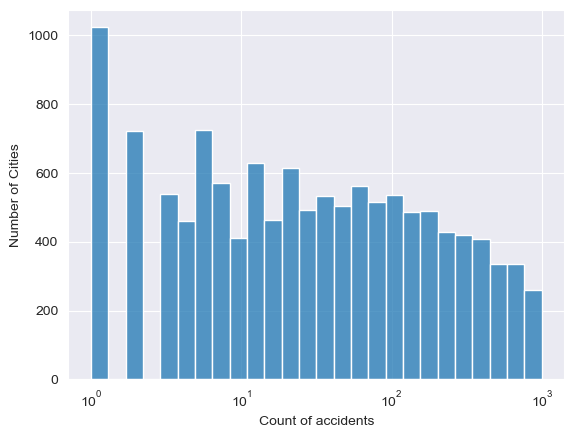

In [35]:
# Visualization
sns.histplot(low_accident_city,log_scale=True)
# Visualization
plt.xlabel("Count of accidents")
# Visualization
plt.ylabel("Number of Cities")
# Visualization
plt.show()

In [36]:
#over 1000 cities has reported just 1 accident(need to investigate)
city_acc[city_acc==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

### Start Time

In [38]:
type(df.Start_Time[0])

str

In [39]:
# Convert Start_Time to datetime format
df.Start_Time= pd.to_datetime(df.Start_Time,format='mixed')

In [40]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

Text(0.5, 0, 'Accidents')

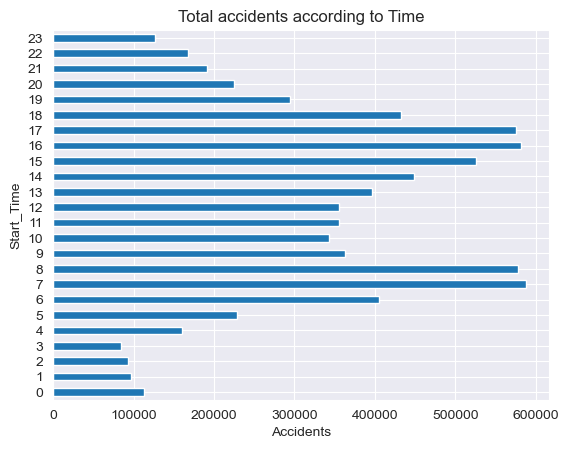

In [41]:
# Extract and analyze the hour of accident
df['Start_Time'].dt.hour.value_counts().sort_index().plot(kind='barh')
# Visualization
plt.title("Total accidents according to Time")
# Visualization
plt.xlabel("Accidents")

C:\Users\rajga\AppData\Local\Temp\ipykernel_18924\174179317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Start_Time'].dt.hour,bins=24)


Text(0.5, 1.0, 'Total accidents according to Time')

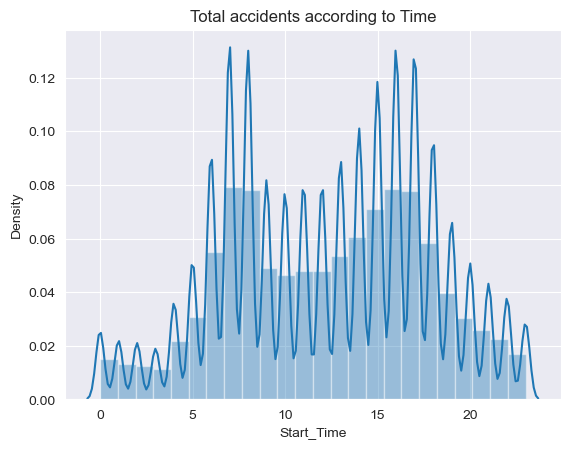

In [42]:
# Extract and analyze the hour of accident
sns.distplot(df['Start_Time'].dt.hour,bins=24)
# Visualization
plt.title("Total accidents according to Time")

In [43]:
# Extract and analyze the hour of accident
acc_time_hr_per=(df['Start_Time'].dt.hour.value_counts()/len(df)*100)

Text(0, 0.5, 'Accident percentage')

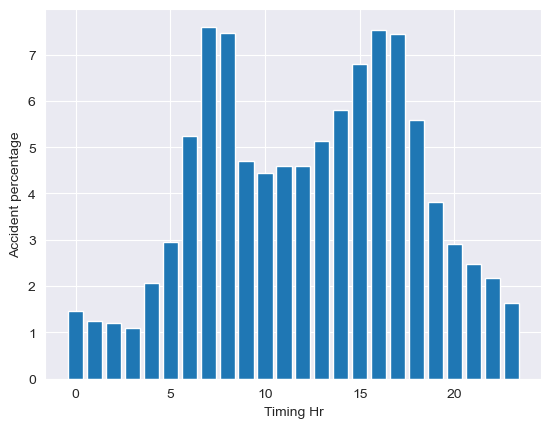

In [44]:
# Visualization
plt.bar(acc_time_hr_per.index,acc_time_hr_per.values)
# Visualization
plt.xlabel("Timing Hr")
# Visualization
plt.ylabel("Accident percentage")

* we can see from above that highest level of accidents occur around 6am to 10pm as it is office timing and it again rises around 3pm to 6pm.

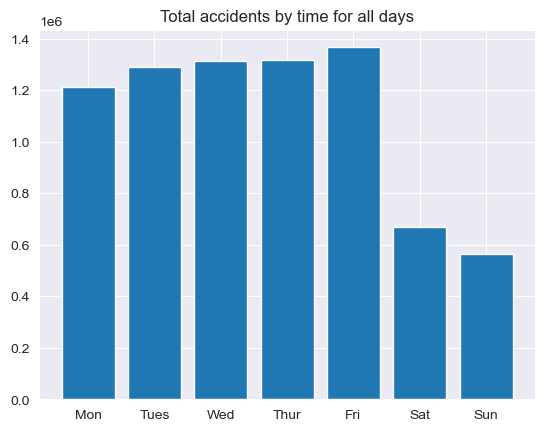

In [46]:
day_lables=['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
# Analyze accidents by day of the week
acc_dayofweek=df['Start_Time'].dt.dayofweek.value_counts().sort_values(ascending=False)
# Visualization
plt.title("Total accidents by time for all days")
# Visualization
plt.bar(acc_dayofweek.index,acc_dayofweek.values)
# Visualization
plt.xticks(ticks=range(7), labels=day_lables)
# Visualization
plt.show()

* we can see max number of accidents occur on week days due to offices and schools, where as weekends has less accidents as no one is in rush

In [48]:
# Analyze accidents by day of the week
data_of_weekend=df[(df['Start_Time'].dt.dayofweek==6) | (df['Start_Time'].dt.dayofweek== 5)]

In [49]:
# Extract and analyze the hour of accident
weekend_timings=data_of_weekend['Start_Time'].dt.hour.value_counts().sort_index()

In [50]:
# Filter data for weekend accidents
weekend_timings

Start_Time
0     36799
1     33209
2     34382
3     28196
4     27429
5     28134
6     34392
7     39925
8     41536
9     49579
10    59633
11    69479
12    74529
13    78811
14    80285
15    75704
16    72662
17    67508
18    64482
19    56609
20    51166
21    49359
22    42506
23    35113
Name: count, dtype: int64

Text(0, 0.5, 'Number of accidents')

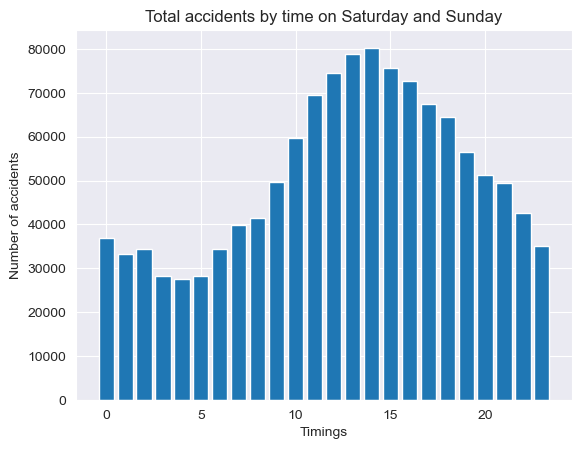

In [51]:
# Visualization
plt.bar(weekend_timings.index,weekend_timings.values)
# Visualization
plt.title("Total accidents by time on Saturday and Sunday")
# Visualization
plt.xlabel("Timings")
# Visualization
plt.ylabel("Number of accidents")

* above we can see the graph for accidents caused on weekend ie Sunday and Saturday. We can conlcude maximum accidents occur during mid aftertoon

In [53]:
# Analyze accidents by day of the week
data_of_weekday=df[(df['Start_Time'].dt.dayofweek==0)]

In [54]:
# Extract and analyze the hour of accident
week_day_timings=data_of_weekday['Start_Time'].dt.hour.value_counts().sort_index()

Text(0, 0.5, 'Number of accidents')

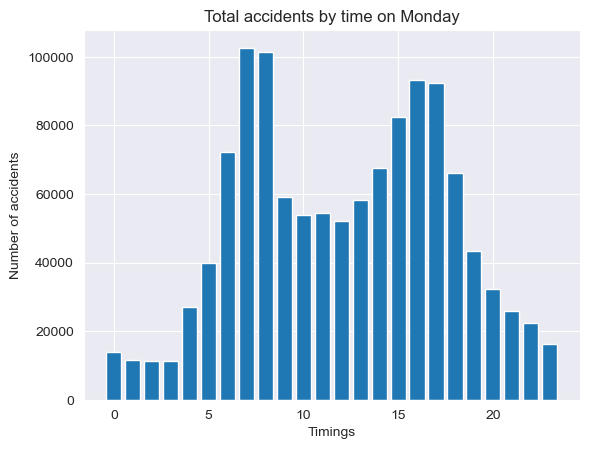

In [55]:
# Visualization
plt.bar(week_day_timings.index,week_day_timings.values)
# Visualization
plt.title("Total accidents by time on Monday")
# Visualization
plt.xlabel("Timings")
# Visualization
plt.ylabel("Number of accidents")

* above we can see the accidents occured on Monday, we can conclude that maximum accidents occur during office timings

Text(0, 0.5, 'Number of accidents')

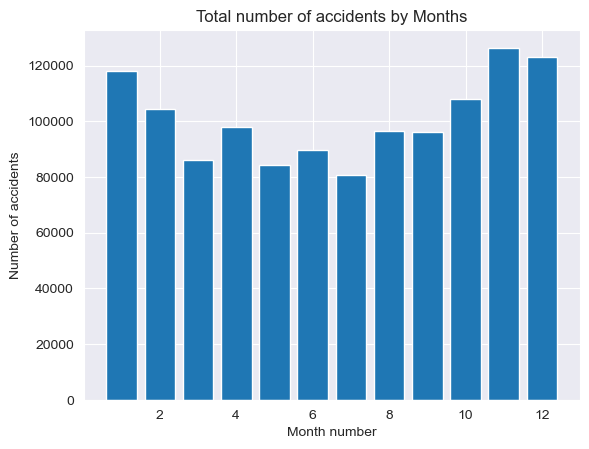

In [57]:
# Visualization
plt.bar(data_of_weekday['Start_Time'].dt.month.value_counts().sort_index().index,
        data_of_weekday['Start_Time'].dt.month.value_counts().sort_index().values)

# Visualization
plt.title("Total number of accidents by Months")
# Visualization
plt.xlabel("Month number")
# Visualization
plt.ylabel("Number of accidents")

* as we have data from feb 2016 to march 2023, we can see there are more accidents from nov to jan. Due to missing data from April 2023 to Dec 2023 we can predecit the amount of accidents would be highest in November and December

Text(0, 0.5, 'Number of accidents')

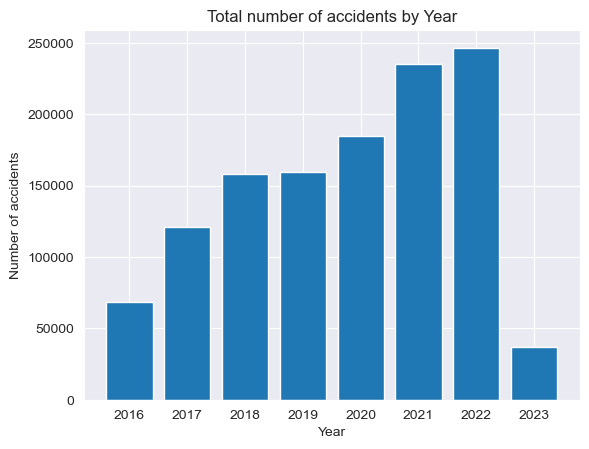

In [59]:
# Visualization
plt.bar(data_of_weekday['Start_Time'].dt.year.value_counts().sort_index().index,
        data_of_weekday['Start_Time'].dt.year.value_counts().sort_index().values)
# Visualization
plt.title("Total number of accidents by Year")
# Visualization
plt.xlabel("Year")
# Visualization
plt.ylabel("Number of accidents")

<Axes: ylabel='count'>

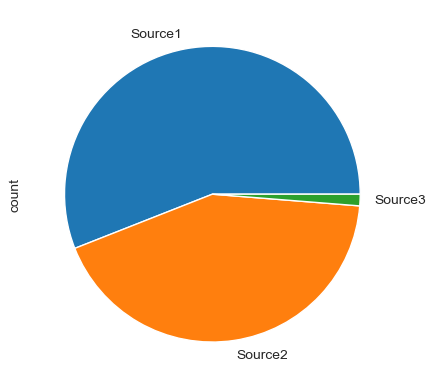

In [60]:
df['Source'].value_counts().plot(kind='pie')

In [61]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [62]:
sample_df = df.sample(int(0.1 * len(df)))

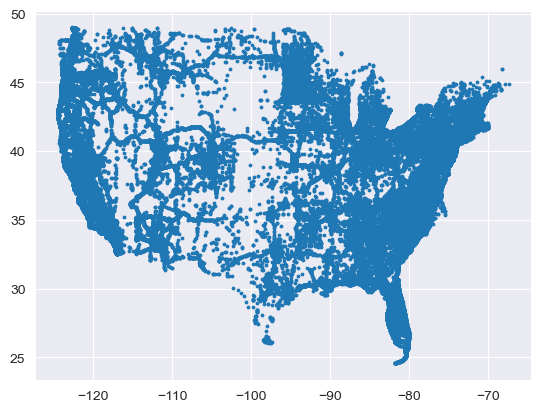

In [63]:
# Visualization
plt.scatter(x=sample_df.Start_Lng, y=sample_df.Start_Lat, s=3)

In [64]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [65]:
# Import necessary libraries
import folium
# Import necessary libraries
from folium.plugins import HeatMap

zip(list(df.Start_Lat), list(df.Start_Lng))

In [66]:
sample2 = df.sample(int(len(df) * 0.01))
map=folium.Map()
HeatMap(zip(list(sample2.Start_Lat), list(sample2.Start_Lng))).add_to(map)
map

# Top learning Outcomes
* High missing data columns can distort analysis if not handled.

* Accidents cluster around certain cities/states—possibly due to population or infrastructure.

* Temporal patterns show peak accidents during morning/evening rush hours.

* Weekend vs. weekday timing patterns differ, highlighting behavioral impacts.

# Dataset Overview
The dataset contains accident records from across the United States.

Initial inspection (df.info()) reveals:

Several columns have missing values.

Date-time fields are stored as strings and were converted to datetime.

It includes geographical (City, State, Start_Lat, Start_Lng), time-based (Start_Time, End_Time), and environmental (Weather_Condition, Visibility, etc.) variables.

# Missing Values Analysis
* Significant missing data was found in these columns:

* Wind_Chill(F) - >50% missing

* Precipitation(in) - >50% missing

* End_Lat and End_Lng - highly incomplete

* Finding: These columns could be dropped or imputed, depending on their relevance to downstream tasks.

* Actionable Insight: For modeling or reporting, consider excluding these columns or replacing them with defaults or flags.

# Accident Distribution by City

* Top 20 cities show a heavily skewed distribution, indicating that:

* Accidents are highly concentrated in certain urban areas (e.g., Los Angeles, Houston).

* Many cities reported only 1–5 accidents.

* Finding: This long-tail distribution suggests potential underreporting in smaller areas or a true difference in urban vs rural accident density.

* Visualization: Bar chart of top 20 cities and histogram of accident counts across all cities (log-scaled).

# State-Level Accident Summary

* Grouping accidents by both City and State, then aggregating by State shows:

* Top 5 states with the most accidents include California, Texas, Florida, North Carolina, and New York.

* Finding: These are high-population and high-traffic states. Good candidates for targeted road safety initiatives.

# Temporal Patterns in Accidents

* Morning (7–9 AM) and Evening (4–6 PM) peaks are visible.

* These correlate strongly with commute times.

* Finding: Time-of-day is a critical factor in accident probability.

# Day of Week

* Weekdays (Mon–Fri) have significantly higher accident counts than weekends.

* Finding: Weekday traffic density contributes to a higher accident rate.

# Weekday vs Weekend Patterns

* Separate filtering shows different distributions for:

* Weekend accidents: More spread out throughout the day.

* Weekday accidents: Clustered during peak hours.

* nsight: Weekday driving is more predictable, while weekend driving is more erratic (e.g., leisure trips, late-night driving).

# Single-Accident Cities

* Over 1,000 cities reported only one accident.